# SC1015 FEL1 Group 2 - *Anime Scorer*
By Jordan Choi, Kye Yong and Yu Kai

## Variables Used & Description

### Dataset Description
*"anime-dataset-2023"*
Contains anime information
Link: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset

<table style="width: 100%; text-align: left">
    <tr>
        <th>Field Name</th>
        <th>Field Description</th>
    </tr>
    <tr>
        <td>anime_id</td>
        <td>Unique ID for each anime.</td>
    </tr>
    <tr>
        <td>Name</td>
        <td>The name of the anime in its original language.</td>
    </tr>
    <tr>
        <td>English Name</td>
        <td>The English name of the anime.</td>
    </tr>
    <tr>
        <td>Other Name</td>
        <td>Other names or titles of the anime in different languages.</td>
    </tr>
    <tr>
        <td>Score</td>
        <td>The score or rating given to the anime.</td>
    </tr>
    <tr>
        <td>Genres</td>
        <td>The genres of the anime, separated by commas.</td>
    </tr>
    <tr>
        <td>Synopsis</td>
        <td>A brief description or summary of the anime's plot.</td>
    </tr>
    <tr>
        <td>Type</td>
        <td>The type of the anime (e.g., TV series, movie, OVA, etc.).</td>
    </tr>
    <tr>
        <td>Episodes</td>
        <td>The number of episodes in the anime.</td>
    </tr>
    <tr>
        <td>Aired</td>
        <td>The dates when the anime was aired.</td>
    </tr>
    <tr>
        <td>Premiered</td>
        <td>The season and year when the anime premiered.</td>
    </tr>
    <tr>
        <td>Status</td>
        <td>The status of the anime (e.g., Finished Airing, Currently Airing, etc.)</td>
    </tr>
    <tr>
        <td>Producers</td>
        <td>The production companies or producers of the anime.</td>
    </tr>
    <tr>
        <td>Licensors</td>
        <td>The licensors of the anime (e.g., streaming platforms).</td>
    </tr>
    <tr>
        <td>Studios</td>
        <td>The animation studios that worked on the anime.</td>
    </tr>
    <tr>
        <td>Source</td>
        <td>The source material of the anime (e.g., manga, light novel, original).</td>
    </tr>
    <tr>
        <td>Duration</td>
        <td>The duration of each episode.</td>
    </tr>
    <tr>
        <td>Rating</td>
        <td>The age rating of the anime.</td>
    </tr>
    <tr>
        <td>Rank</td>
        <td>The rank of the anime based on popularity or other criteria.</td>
    </tr>
    <tr>
        <td>Popularity</td>
        <td>The popularity rank of the anime.</td>
    </tr>
    <tr>
        <td>Favorites</td>
        <td>The number of times the anime was marked as a favorite by users.</td>
    </tr>
    <tr>
        <td>Scored By</td>
        <td>The number of users who scored the anime.</td>
    </tr>
    <tr>
        <td>Members</td>
        <td>The number of members who have added the anime to their list on the platform.</td>
    </tr>
    <tr>
        <td>Image URL</td>
        <td>The URL of the anime's image or poster.</td>
    </tr>
</table>
<hr>
#### anime_id - done
in order, retaining in case we're analysing other datasets.

#### Name - done
in order, crucial to analyse. Will serve as the primary name since there are 3 different identifiers and this contains unique values for all rows. 

#### English name - done
to retain, so that we can find out whether the existence of an English name affects the score. 
There seem to be 3 cases: 
"English Name" is same as "Name", 
"Name" contains words of other languages and "English Name" differs from "Name", 
or "English Name" is "UNKNOWN".

#### Other name - done
to remove from dataframe, since majority of the values are the Japanese Hiragana name, which none of us understand and is probably irrelevant.

#### Score 
Crucial Field. The type of this field in the raw dataset is "object". To convert to decimal values. Contains 9213 fields with "UNKNOWN"
We will use the following approach to replace the values of Unknown.

1) Find out the correlation of score with other likely fields, such as Rank and Popularity.
2) Separate into different bins, and use the mean/median score of the corresponding bin to replace the "UNKNOWN" value.

#### Genres
Some titles may contain more than 1 genre, hence, multi-label binarization will be used to clean up this column. A unique column label will be created for each genre. Binary values (0 or 1) will be used to indicate if the title belongs to the respective genre.

4929 titles with "Unknown" genres, will remain as 0 for all genres.

#### Sypnosis
We will leave the sypnosis as it is. We may or may not use it, depending if we can implement a language model to analyse this text. There are 4535 without description - "No description available for this anime".

#### Type
Categorical Data, will be converted to a numeral value to represent each category.
- Movie
- Music
- ONA
- OVA
- Special
- TV
- Unknown

There are 74 titles with unknown type in the raw dataset. Will be expelled from dataframe.

Almost all of 2686 titles with "Music" category are Animated Music Videos with less than 10 mins "Duration" time. We're not interested in this hence will be expelled from the dataframe.

"Movie" and "Special" titles will also be expelled from the dataframe, since we're only interested in the analysis of anime series - aired either on TV, Online Streaming Platforms (ONA), or Home Video Release (OVA).


#### Episodes
611 titles with "unknown" number of episodes. Some of these contain popular titles - like "Detective Conan".
We will use the following approach to replace the values of Unknown.

Priority 1 - Since most anime are typically released weekly, we will calculate the number of weeks each anime is aired for if available. Then, we will get the average numbers of episodes released in a week. When the figure is available, we will estimate the number of episodes for titles with unknown episodes, through the number of running weeks * average number of episodes/week.

Priority 2 - If the type is available, we will categorize into bins, and replace the unknown values of the bins with the average number of episodes for the type.

The accurate value of episodes is likely irrelevant, hence a range can be considered to be used. (Eg. < 50, <100, <200, <300, <400, <500)

#### Aired
Will be separated into start and end date. Is the day field necessary? 
Air dates of 915 titles are "Not Available". We will replace these with "NaT".

#### Premiered
The season where the title was first released.
19399 titles are "UNKNOWN".
This column will be expelled from the data since majority of the values are UNKNOWN, and the start date is available.

#### Licensors
20170 titles are "UNKNOWN", it is unlikely this column can provide any valuable insights on our problem. This column will be expelled from the data since majority of the values are UNKNOWN.

#### Studios
10526 titles are "UNKNOWN'. Since the studios who produced the anime titles could be an important factor to determine the success of an anime title, this column will be retained. Titles can be a collaboration of more than 1 studios, hence, we will follow a similar approach to Genres. Multi-label binarization will be employed. A unique column label will be created for each studio. Binary values (0 or 1) will be used to indicate if the title belongs to the respective studio.

UNKNOWN titles will have 0s in all known studios.

#### Source
Will be converted to Numerical Values to represent the categories.

- 4-koma manga
- Book
- Card Game
- Game
- Light Novel
- Manga
- Mixed Media
- Music
- Novel
- Original
- Other
- Picture Book
- Radio
- Unknown
- Visual Novel
- Web Manga
- Web Novel

Since the source is unlikely possible to be determined through other columns, unknown will remain as unknown - 3689 titles.

#### Duration
In the raw data, duration is difficult to process as it is represented as an object. All values will be converted to minutes, represented in numerical value.

Any titles with less than 10 minutes running time will be expelled, as it is unlikely to be an anime series we're trying to study.


#### Rating
All values will be converted to numerical values to represent various categorical value.

G - All Ages
PG - Children
PG-13 - Teens 13 or older
R - 17+ (violence)
R+ - Mild Nudity
Rx - Hentai
UNKNOWN

669 titles have Unknown ratings. Will remain as unknown since it is unlikely to estimate from other columns.

#### Rank
4612 titles has unknown ranks.
187 titles has Rank "0" - it is invalid as each rank should be unique exclusively to each title. Hence this will be treated as unknown data.

#### Popularity
187 titles with Popularity "0"
1 title with no popularity value.

#### Favorites
167 titles with Favorites "0"

#### Scored By
9213 values with "Unknown". Will be replaced with the median values of "Scored By" column.

#### Members
No cleaning required. Data is processable.

#### Image URL
No cleaning required. Can consider to remove, but perhaps we can use machine learning to determine whether poster image affects the success of an anime.


In [75]:
# Import the Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

# Import & Clean "Anime Dataset 2023" Dataset
#anime_data = pd.read_csv("dataset/anime-dataset-2023.csv")
anime_data = pd.read_csv("anime-dataset-2023.csv")
pd.set_option('display.max_rows', 500)
anime_data.head(len(anime_data))

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [76]:
# Check the basic information of the dataset.
print(anime_data.dtypes)

anime_id         int64
Name            object
English name    object
Other name      object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Licensors       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object


## Data Cleanup

### Cleaning - Unnecessary Columns

In [77]:
# Copy the raw data into a new dataframe for cleaning.
anime_cleaned_df = anime_data.copy()

# Drop unnecessary columns that are irrelevant to our analysis or unmeaningful due to Unknown values
# - "Other Name", "Premiered", "Licensors" 
anime_cleaned_df = anime_cleaned_df.drop(['Other name', 'Licensors'], axis=1)

# Check if the columns are dropped successfully.
anime_cleaned_df.dtypes

anime_id         int64
Name            object
English name    object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object

### Premier map to Seasons

In [78]:
import re

month_map = {
    'Jan': 'winter', 'Feb': 'winter', 'Mar': 'winter', 'Apr': 'spring',
    'May': 'spring', 'Jun': 'spring', 'Jul': 'summer', 'Aug': 'summer',
    'Sep': 'summer', 'Oct': 'fall', 'Nov': 'fall', 'Dec': 'fall'
}
# Function to determine the values for Premiered, Start Air, and End Air
def process_aired(row):
    aired_value = row['Aired']
    
    if aired_value == "Not available":
        return pd.Series(["NA", "NA", row['Premiered']])

    # Regex pattern for date matching
    date_pattern = r'([A-Za-z]{3} \d{1,2}, \d{4})'
    two_date_pattern = r'([A-Za-z]{3} \d{1,2}, \d{4}) to ([A-Za-z]{3} \d{1,2}, \d{4})'
    to_question_pattern = r'([A-Za-z]{3} \d{1,2}, \d{4}) to \?'
    year_pattern = r'(\d{4})'
    month_year_pattern = r'([A-Za-z]{3} \d{4})'  # New pattern for "Jun 1984"
    
    if pd.notna(aired_value):
        if "to ?" in aired_value:
            # Match for "date to ?"
            match = re.match(to_question_pattern, aired_value)
            if match:
                start_date = match.group(1)
                return pd.Series([start_date, "NA", row['Premiered']])
        
        elif "to" in aired_value:
            # Match for "date to date"
            match = re.match(two_date_pattern, aired_value)
            if match:
                start_date = match.group(1)
                end_date = match.group(2)
                return pd.Series([start_date, end_date, row['Premiered']])

        elif re.match(date_pattern, aired_value):
            # Match for single date
            match = re.match(date_pattern, aired_value)
            if match:
                start_date = match.group(1)
                return pd.Series([start_date, start_date, row['Premiered']])

        elif re.match(year_pattern, aired_value):
            # Match for year only
            match = re.match(year_pattern, aired_value)
            if match:
                year = match.group(1)
                return pd.Series([year, year, row['Premiered']])

        elif re.match(month_year_pattern, aired_value):
            # Match for month and year only
            match = re.match(month_year_pattern, aired_value)
            if match:
                month_year = match.group(1)
                return pd.Series([month_year, month_year, row['Premiered']])
        
        else:
            print(f"Error: Unrecognized value in 'Aired' column: {aired_value}")
            return pd.Series([np.nan, np.nan, row['Premiered']])
        
    return pd.Series([np.nan, np.nan, row['Premiered']])

# Update the 'Premiered' column based on the Start Air month if it is 'UNKNOWN'
def update_premiered(row):
    if row['Premiered'] == 'UNKNOWN' and pd.notna(row['Start Air']):
        month = row['Start Air'][:3]  # Get the month part
        year = row['Start Air'][-4:]   # Get the year part
        if month in month_map:
            row['Premiered'] = f"{month_map[month]} {year}"
    return row


# # Sample data
# data = {
#     'Aired': [
#         "Not available",
#         "Apr 6, 2023",
#         "Apr 6, 2023 to Jun 20, 2023",
#         "Jul 1, 2022 to ?",
#         "2021",
#         "Unknown Value"
#     ],
#     'Premiered': ['UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN']
# }
# # Process each row in the DataFrame
# df[['Start Air', 'End Air', 'Premiered']] = df.apply(process_aired, axis=1)
# df = df.apply(update_premiered, axis=1)
# # Display the final DataFrame
# print(df)


anime_cleaned_df[['Start Air', 'End Air', 'Premiered']] = anime_cleaned_df.apply(process_aired, axis=1)
anime_cleaned_df = anime_cleaned_df.apply(update_premiered, axis=1)

# Display the final DataFrame

pd.set_option('display.max_columns', None)
anime_cleaned_df.head(len(anime_cleaned_df))

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Air,End Air
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,"Apr 3, 1998","Apr 24, 1999"
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",summer 2001,Finished Airing,"Sunrise, Bandai Visual",Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...,"Sep 1, 2001","Sep 1, 2001"
2,6,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,"Apr 1, 1998","Sep 30, 1998"
3,7,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,"Jul 3, 2002","Dec 25, 2002"
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,"Sep 30, 2004","Sep 29, 2005"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",summer 2023,Not yet aired,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,"Jul 4, 2023",NA
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",summer 2023,Not yet aired,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,"Jul 27, 2023",NA
24902,55733,Di Yi Xulie,The First Order,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",summer 2023,Finished Airing,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...,"Jul 19, 2023",NA
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",spring 2022,Finished Airing,UNKNOWN,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...,"Apr 23, 2022","Apr 23, 2022"


### Cleaning - "Type" Column

In [79]:
# Drop rows with "Music", "Movie", "Special" value of Type. Retaining only "TV", "ONA" and "OVA" - which are our focus of this project.
# Remove these rows by filtering those values of Type using "isin()"

# Filter the DataFrame to exclude rows where the "Type" column is "Movie", "Music", or "Special"
anime_cleaned_df = anime_cleaned_df[~anime_cleaned_df['Type'].isin(['Movie', 'Music', 'Special', 'UNKNOWN'])]

# Check if rows are dropped successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Type'].isin(['Movie', 'Music', 'Special', 'UNKNOWN'])]
filtered_df

anime_cleaned_df.describe()

,anime_id,Popularity,Favorites,Members
count,15206.000000,15206.000000,15206.000000,1.520600e+04
mean,28358.823491,11516.737472,649.390833,5.149600e+04
std,18396.556175,7524.147345,5436.525592,1.912491e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,8194.250000,4963.500000,0.000000,2.390000e+02
50%,33774.000000,10624.000000,3.000000,1.943500e+03
75%,45464.750000,17985.250000,40.000000,1.519250e+04
max,55733.000000,24723.000000,217606.000000,3.744541e+06


### Cleaning - "English name" Column

In [ ]:
# 'English name' values which are either 'UNKNOWN' or duplicate of 'Name' values are replaced with 'None'
anime_cleaned_df['English name'] = anime_cleaned_df.apply(lambda row: None if row['English name'] == row['Name'] else row['English name'], axis=1)
anime_cleaned_df['English name'].replace("UNKNOWN", None, inplace=True)

### Cleaning - "Score" Column

In [ ]:
# Set Unknown Values of Score to "NaN" first.
anime_cleaned_df['Score'] = anime_cleaned_df['Score'].replace("Unknown", np.nan)
anime_cleaned_df['Score'] = pd.to_numeric(anime_cleaned_df['Score'], errors='coerce')

In [ ]:
# Verify if "UNKNOWN" values are replaced by "NaN" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'] == 'UNKNOWN']
filtered_df

### NEED TO REPLACE UNKNOWN VALUES!

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Air,End Air


In [97]:
nan_count = anime_cleaned_df['Score'].isna().sum()

print(f"Number of NaN values in 'Score': {nan_count}")

Number of NaN values in 'Score': 5512


### Cleaning - "Genre" Column - Use Multi Label Binarization

In [88]:
# Remove "Unknown"

# Split the genre into a list
anime_cleaned_df['Genres List'] = anime_cleaned_df['Genres'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(anime_cleaned_df['Genres List'])

# DataFrame for Encoded Genres 
genres_df = pd.DataFrame(encoded_genres, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from genres_df
genres_df = genres_df.drop(['UNKNOWN'], axis=1)

# Merge into the original anime dataframe using join.
anime_cleaned_df = anime_cleaned_df.join(genres_df)


In [89]:
# Loop through the genre columns with binary values - check if they are classes generated by mlb.
genre_columns = [col for col in anime_cleaned_df.columns if col in mlb.classes_]  # mlb.classes_ contains the genre names

# Replace NaN values in genre columns with 0
anime_cleaned_df[genre_columns] = anime_cleaned_df[genre_columns].fillna(0)

# Convert genre columns to int64
anime_cleaned_df[genre_columns] = anime_cleaned_df[genre_columns].astype('int64')

print(anime_cleaned_df.dtypes)

anime_id           int64
Name              object
English name      object
Score            float64
Genres            object
Synopsis          object
Type              object
Episodes          object
Aired             object
Premiered         object
Status            object
Producers         object
Studios           object
Source            object
Duration          object
Rating            object
Rank              object
Popularity         int64
Favorites          int64
Scored By         object
Members            int64
Image URL         object
Start Air         object
End Air           object
Genres List       object
Action             int64
Adventure          int64
Avant Garde        int64
Award Winning      int64
Boys Love          int64
Comedy             int64
Drama              int64
Ecchi              int64
Erotica            int64
Fantasy            int64
Girls Love         int64
Gourmet            int64
Hentai             int64
Horror             int64
Mystery            int64


In [90]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
anime_cleaned_df

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Air,End Air,Genres List,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,Girls Love,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,1,Cowboy Bebop,None,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,"Apr 3, 1998","Apr 24, 1999","[Action, Award Winning, Sci-Fi]",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,6,Trigun,None,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,"Apr 1, 1998","Sep 30, 1998","[Action, Adventure, Sci-Fi]",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,7,Witch Hunter Robin,None,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,"Jul 3, 2002","Dec 25, 2002","[Action, Drama, Mystery, Supernatural]",1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,"Sep 30, 2004","Sep 29, 2005","[Adventure, Fantasy, Supernatural]",0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,15,Eyeshield 21,None,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,"Apr 6, 2005","Mar 19, 2008",[Sports],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Boys Love,Wanna fake-date for 4 weeks?\r\nDojun's life a...,ONA,10.0,"Apr 4, 2023 to ?",spring 2023,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min per ep,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,"Apr 4, 2023",NA,[Boys Love],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24895,55726,"Die, Please!",None,NaN,"Fantasy, Romance",I just want to tell him how I feel!\r\nMina ha...,ONA,UNKNOWN,"May 31, 2023 to ?",spring 2023,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,"May 31, 2023",NA,"[Fantasy, Romance]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
24900,55731,Wu Nao Monu,None,NaN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",summer 2023,Not yet aired,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,"Jul 4, 2023",NA,"[Comedy, Fantasy, Slice of Life]",0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,"Action, Adventure, Fantasy",No description availab

## Significance of Variables

### Question 1: Does Season of release affect the Score? 

No data available for plotting. Please check the 'Premiered' and 'Score' fields for correct formatting.


C:\Users\kyeyo\AppData\Local\Temp\ipykernel_16940\3358656332.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='coolwarm')


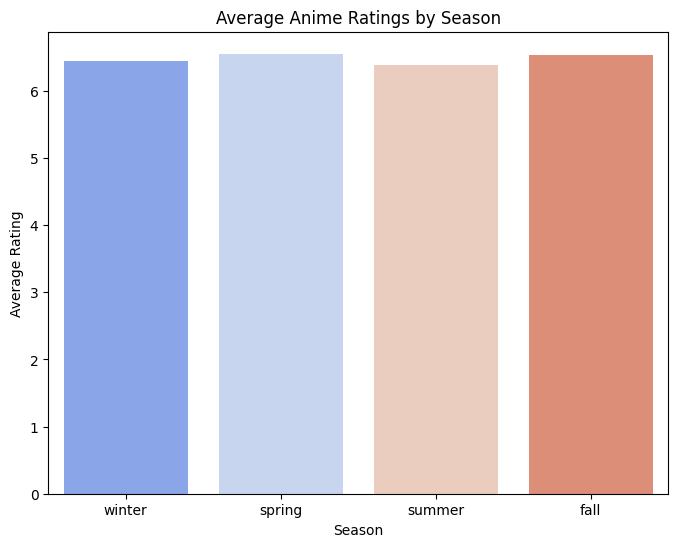

ANOVA F-statistic: 18.433, p-value: 6.41e-12
The differences between seasons are statistically significant.


In [91]:
import scipy.stats as stats

# Create a copy of the anime_cleaned_df
anime_copy = anime_cleaned_df.copy()

# Function to extract season and year from the 'Premiered' column
def extract_season_and_year(value):
    try:
        season, year = value.split()
        return season, int(year)
    except (ValueError, AttributeError):
        return np.nan, np.nan

# Apply the extraction function on the copy
anime_copy[['Season', 'Year']] = anime_copy['Premiered'].apply(
    lambda x: pd.Series(extract_season_and_year(x))
)

# Drop rows with missing or NaN values in 'Score', 'Season', or 'Year' in the copy
anime_copy = anime_copy.dropna(subset=['Score', 'Season', 'Year'])

# Group by Year and Season, then calculate the average score for each season in the copy
seasonal_avg_scores = (
    anime_copy.groupby(['Year', 'Season'])['Score']
    .mean()
    .reset_index()
    .sort_values(['Year', 'Season'], ascending=True)
)

# Map seasons to representative months
season_to_month = {
    'winter': '01',  # January
    'spring': '04',  # April
    'summer': '07',  # July
    'fall': '10'     # October
}

# Create a Date column by combining Year and mapped Month
seasonal_avg_scores['Month'] = seasonal_avg_scores['Season'].str.lower().map(season_to_month)
seasonal_avg_scores['Date'] = seasonal_avg_scores['Year'].astype(str) + '-' + seasonal_avg_scores['Month'] + '-01'

# Convert to datetime format
seasonal_avg_scores['Date'] = pd.to_datetime(seasonal_avg_scores['Date'], format='%Y-%m-%d', errors='coerce')

# Drop rows with invalid Date values in the copy
seasonal_avg_scores = seasonal_avg_scores.dropna(subset=['Date'])

# Sort Ascending dates
seasonal_avg_scores = seasonal_avg_scores.sort_values(by='Date', ascending=True)

# Plotting
if seasonal_avg_scores.empty:
    print("No data available for plotting. Please check the 'Premiered' and 'Score' fields for correct formatting.")
else:
    plt.figure(figsize=(12, 6))
    plt.plot(seasonal_avg_scores['Date'], seasonal_avg_scores['Score'], marker='o')
    plt.title('Average Anime Score by Season')
    plt.xlabel('Season')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Group by season, ignoring the year, and calculate the average score in the copy
seasonal_avg = anime_copy.groupby('Season')['Score'].mean().reindex(['winter', 'spring', 'summer', 'fall'])

# Plot the bar chart
plt.figure(figsize=(8, 6))
sb.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='coolwarm')
plt.title('Average Anime Ratings by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()

# Prepare data for ANOVA from the copy
winter_ratings = anime_copy[anime_copy['Season'] == 'winter']['Score']
spring_ratings = anime_copy[anime_copy['Season'] == 'spring']['Score']
summer_ratings = anime_copy[anime_copy['Season'] == 'summer']['Score']
fall_ratings = anime_copy[anime_copy['Season'] == 'fall']['Score']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(winter_ratings, spring_ratings, summer_ratings, fall_ratings)

# Output the results
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.2e}")
if p_value < 0.05:
    print("The differences between seasons are statistically significant.")
else:
    print("No significant difference between seasons.")

del (anime_copy)

In [ ]:
print(anime_cleaned_df.columns)

Index(['anime_id', 'Name', 'English name', 'Score', 'Genres', 'Synopsis',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers',
       'Studios', 'Source', 'Duration', 'Rating', 'Rank', 'Popularity',
       'Favorites', 'Scored By', 'Members', 'Image URL', 'Start Air',
       'End Air', 'Genres List', 'Action', 'Adventure', 'Avant Garde',
       'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Erotica',
       'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 'Horror', 'Mystery',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Suspense'],
      dtype='object')


### Question 2: Which variables affect Score? 

In [ ]:
# Updated lookup table to classify fields with invalid values (na_List) and field type
field_classification = {
    '':{'type':'','na_List':[]},
    'anime_id':{'type':'Work In Progress','na_List':[]},
    'Name':{'type':'Work In Progress','na_List':[]},
    'English name':{'type':'one-hot','na_List':[]},
    'Score':{'type':'','na_List':[]},
    'Type':{'type':'','na_List':[]},
    'Episodes':{'type':'','na_List':[]},
    'Aired':{'type':'','na_List':[]},
    'Premiered':{'type':'','na_List':[]},
    'Studios':{'type':'','na_List':[]},
    'Source':{'type':'','na_List':[]},
    '': {'type': 'categorical', 'na_List': ["NA", "UNKNOWN", "Not Available"]},
    'Duration':{'type':'','na_List':[]},
    'Rating':{'type':'','na_List':[]},
    'Favorites':{'type':'','na_List':[]},
    'Scored By':{'type':'','na_List':[]},
    'Members':{'type':'','na_List':[]},
    'Image URL':{'type':'','na_List':[]},
    'Start Air':{'type':'','na_List':[]},
    'End Air':{'type':'','na_List':[]},
    '':{'type':'','na_List':[]},
    '':{'type':'','na_List':[]},
    # Add more fields with their classifications and invalid values as needed
}

# Global dataframe (you'll access anime_cleaned_df globally)
global anime_cleaned_df

def analyze_field(field, stat_p=0.05):
    """
    Analyzes whether a given field affects the 'Score' field significantly.
    
    Parameters:
    - field (str): The name of the field to analyze.
    - stat_p (float): The significance level (default is 0.05).
    """
    # Check if the field exists in the classification table
    if field not in field_classification:
        raise ValueError(f"Field '{field}' not found in the classification table. Please add it.")
    
    # Access field's classification and invalid values from the lookup table
    field_info = field_classification[field]
    field_type = field_info['type']
    na_List = field_info['na_List']
    
    # Create a copy of the dataframe to avoid modifying the original
    df = anime_cleaned_df.copy()

    # Drop rows containing invalid values in the specified field or NaN
    df = df[~df[field].isin(na_List)].dropna(subset=['Score', field])

    # Check if the field exists in the dataframe
    if field not in df.columns:
        raise ValueError(f"Field '{field}' not found in the dataframe.")
    
    # Perform statistical test based on the field type
    if field_type == 'categorical':
        # Conduct ANOVA for categorical data
        grouped_data = [df[df[field] == value]['Score'] for value in df[field].unique()]
        f_stat, p_value = stats.f_oneway(*grouped_data)

        print(f"ANOVA for '{field}': F-statistic = {f_stat:.3f}, p-value = {p_value:.2e}")
        if p_value < stat_p:
            print(f"The field '{field}' significantly affects the 'Score'.")
        else:
            print(f"The field '{field}' does not significantly affect the 'Score'.")

    elif field_type == 'numerical':
        # Conduct Spearman Rank Correlation for numerical data
        correlation, p_value = stats.spearmanr(df[field], df['Score'])
        
        print(f"Spearman Rank Correlation for '{field}' and 'Score': correlation = {correlation:.3f}, p-value = {p_value:.2e}")
        if p_value < stat_p:
            print(f"The field '{field}' significantly affects the 'Score'.")
        else:
            print(f"The field '{field}' does not significantly affect the 'Score'.")

    elif field_type == 'one-hot':
        # Conduct independent two-sample t-test for one-hot encoded data
        unique_values = df[field].unique()
        
        if len(unique_values) != 2:
            raise ValueError(f"The field '{field}' must be a binary one-hot encoded field (contains exactly two unique values).")
        
        group_1 = df[df[field] == unique_values[0]]['Score']
        group_2 = df[df[field] == unique_values[1]]['Score']

        t_stat, p_value = stats.ttest_ind(group_1, group_2)

        print(f"T-test for '{field}': t-statistic = {t_stat:.3f}, p-value = {p_value:.2e}")
        if p_value < stat_p:
            print(f"The field '{field}' significantly affects the 'Score'.")
        else:
            print(f"The field '{field}' does not significantly affect the 'Score'.")
    else:
        print(f"Field type '{field_type}' not recognized. Please update the classification table.")

# Example usage (make sure to update the classification table accordingly):
# analyze_field('Source', stat_p=0.05)